
# Project: TMDb Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The Dataset is called The Movie Database (TMDb) and it contain around 10,000 records of movies with it's information like budget,revenue,movie_name,cast,director ,release_year, etc


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
df['keywords']

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

> First, I dropped the un-wanted columns that I will not use in my analysis. Secondly. I checked for null values and if they are numeric I replaced them with the mean and if they are not numeric I dropped them. Thirdly, I checked for the duplicates and they were dropped and Lastly, I changed the release_date datatype to date and time.



### Data Cleaning (Replace this with more specific notes!)

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','production_companies','budget_adj','revenue_adj'],axis = 1,inplace=True)

In [8]:
df.drop(['overview'],axis =1 ,inplace = True)

In [9]:
df.shape

(10866, 11)

In [10]:
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director  runtime                                     genres  \
0   Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1     George Miller      120  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3       J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4         James Wan      137                      Action|Crime|Thriller   

  release_date  vote_count  vote_average  release_year  
0       6/9/15        5562           6.5          2015  
1      5/13/15        6185           7.1          2015  
2      3/18/15        2480           6.3          2015  
3     12/15/15        5292           7.5          2015  
4       4/1/15        2947           7.3          2015

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


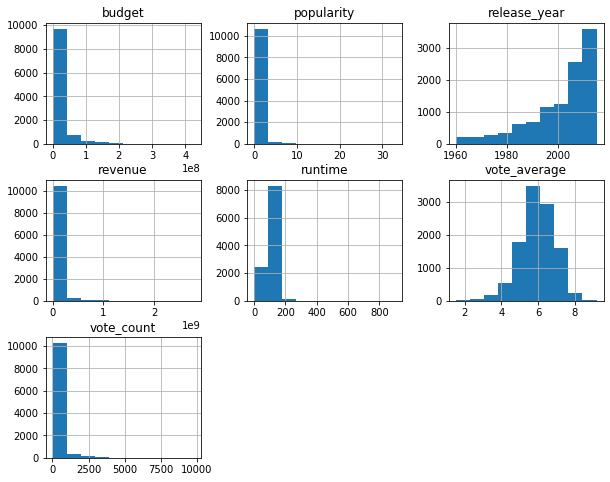

In [12]:
df.hist(figsize=(10,8));

In [13]:
df.isnull().values.any()

True

In [14]:
df.isnull().values.sum()

67

In [15]:
df.fillna(df.mean(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [16]:
df[df.genres.isnull()]

popularity  budget  revenue  \
424      0.244648       0        0   
620      0.129696       0        0   
997      0.330431       0        0   
1712     0.302095       0        0   
1897     0.020701       0        0   
2370     0.081892       0        0   
2376     0.068411       0        0   
2853     0.130018       0        0   
3279     0.145331       0        0   
4547     0.520520       0        0   
4732     0.235911       0        0   
4797     0.167501       0        0   
4890     0.083202       0        0   
5830     0.248944       0        0   
5934     0.067433       0        0   
6043     0.039080       0        0   
6530     0.092724       0        0   
8234     0.028874       0        0   
8614     0.273934       0        0   
8878     0.038045       0        0   
9307     0.094652       0        0   
9799     0.175008       0        0   
10659    0.344172    5000        0   

                                          original_title  \
424                                       Belli di papÃ    
620                                   All Hallows' Eve 2   
997                 Star Wars Rebels: Spark of Rebellion   
1712                                   Prayers for Bobby   
1897              Jonas Brothers: The Concert Experience   
2370                                     Freshman Father   
2376                       Doctor Who: A Christmas Carol   
2853                                           Vizontele   
3279                                       ì•„ê¸°ì™€ ë‚˜   
4547   London 2012 Olympic Opening Ceremony: Isles of...   
4732                                       The Scapegoat   
4797                             Doctor Who: The Snowmen   
4890                          Cousin Ben Troop Screening   
5830                  Doctor Who: The Time of the Doctor   
5934                                        Prada: Candy   
6043                                      Bombay Talkies   
6530                                         Saw Rebirth   
8234                                     Viaggi di nozze   
8614                          T2 3-D: Battle Across Time   
8878                     Mom's Got a Date With a Vampire   
9307                                           Goldeneye   
9799                                         The Amputee   
10659                      The Party at Kitty and Stud's   

                                                director  runtime genres  \
424                                         Guido Chiesa      100    NaN   
620    Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...       90    NaN   
997                            Steward Lee|Steven G. Lee       44    NaN   
1712                                     Russell Mulcahy       88    NaN   
1897                                     Bruce Hendricks       76    NaN   
2370                                       Michael Scott        0    NaN   
2376                                                 NaN       62    NaN   
2853                                    YÄ±lmaz ErdoÄŸan      110    NaN   
3279                                       Kim Jin-Yeong       96    NaN   
4547                                         Danny Boyle      220    NaN   
4732                                   Charles Sturridge      100    NaN   
4797                                                 NaN       60    NaN   
4890                                        Wes Anderson        2    NaN   
5830                                         James Payne       60    NaN   
5934                          Wes Anderson|Roman Coppola        3    NaN   
6043   Anurag Kashyap|Dibakar Banerjee|Zoya Akhtar|Ka...      127    NaN   
6530                            Jeff Shuter|Daniel Viney        6    NaN   
8234                                       Carlo Verdone      103    NaN   
8614                                       James Cameron       12    NaN   
8878                                         Steve Boyum       85    NaN   
9307                                            Don Boyd 

In [17]:
df[df.director.isnull()]

popularity   budget   revenue  \
532      0.126594        0         0   
548      0.108072        0         0   
556      0.100910        0         0   
1032     0.291253        0         0   
1054     0.269468        0         0   
1203     0.119891   150000         0   
1241     0.135376        0         0   
1288     0.038364        0         0   
1852     0.256703        0         0   
1872     0.091395  3250000         0   
1895     0.056777        0         0   
2221     0.281852        0         0   
2286     0.207234        0         0   
2290     0.203502        0         0   
2315     0.171615        0         0   
2318     0.170408        0         0   
2376     0.068411        0         0   
2397     0.033048        0         0   
2401     0.067753        0         0   
2403     0.067620        0         0   
3171     0.019819        0         0   
3224     0.224721        0         0   
3276     0.147657  4180000  11000000   
3285     0.136883        0         0   
3357     0.042517        0         0   
3365     0.002475        0         0   
3369     0.001682        0         0   
3910     0.002006        0         0   
4679     0.421746        0         0   
4797     0.167501        0         0   
4872     0.090552        0         0   
4939     0.003183        0         0   
5413     0.324270        0         0   
5866     0.211825  5000000         0   
5915     0.168210        0         0   
5972     0.165605        0         0   
6033     0.048587        0         0   
6181     0.000065        0         0   
7579     0.443952        0         0   
7767     0.126603        0         0   
7814     0.040311        0         0   
9593     0.001662        0         0   
10386    0.118854        0         0   
10426    0.114034        0         0   

                                          original_title director  runtime  \
532                       Iliza Shlesinger: Freezing Hot      NaN       71   
548                           Sense8: Creating the World      NaN       25   
556                                       With This Ring      NaN      105   
1032               Marvel Studios: Assembling a Universe      NaN       43   
1054                                  Unlocking Sherlock      NaN       60   
1203                                        Free to Play      NaN       75   
1241                                           Dance-Off      NaN        0   
1288                   Top Gear: The Perfect Road Trip 2      NaN       94   
1852                             The Diary of Anne Frank      NaN      100   
1872                                                 Paa      NaN      133   
1895                      Doctor Who: The Waters of Mars      NaN       62   
2221                     Scott Pilgrim vs. the Animation      NaN        4   
2286                     Bo Burnham: Words, Words, Words      NaN       63   
2290       Across the Line: The Exodus of Charlie Wright      NaN       94   
2315                                Listen to Your Heart      NaN        0   
2318                            Barbie in A Mermaid Tale      NaN       75   
2376                       Doctor Who: A Christmas Carol      NaN       62   
2397                      The Making of The Walking Dead      NaN       30   
2401     Opeth: In Live Concert At The Royal Albert Hall      NaN      163   
2403                     Yu-Gi-Oh! 3D: Bonds Beyond Time      NaN       60   
3171   The Assassination of Jesse James: Death Of An ...      NaN       32   
3224   John Mayer: Where the Light Is Live in Los Ang...      NaN      164   
3276                                   Kismat Konnection      NaN      153   
3285                     Tropic Thunder: Rain of Madness      NaN       30   
3357                        Bill Burr: Why Do I Do This?      NaN       55   
3365               Foo Fighters: Live at Wembley Stadium      NaN      120   
3369                 Wizards On Deck With Hannah Montana      NaN       68   
3910                  

In [18]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1012.6+ KB


In [19]:
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director  runtime                                     genres  \
0   Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1     George Miller      120  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3       J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4         James Wan      137                      Action|Crime|Thriller   

  release_date  vote_count  vote_average  release_year  
0       6/9/15        5562           6.5          2015  
1      5/13/15        6185           7.1          2015  
2      3/18/15        2480           6.3          2015  
3     12/15/15        5292           7.5          2015  
4       4/1/15        2947           7.3          2015

In [20]:
df['release_date']=pd.to_datetime(df['release_date'])

In [21]:
df.duplicated().sum()

1

In [22]:
df.drop_duplicates(inplace = True)

### I divided my Revenue into below mean and above mean to categorize the values and the dataset is too large so I can have clear visualization and more specified results

In [23]:
df.revenue.mean()

40065576.46990741

In [24]:
df.rev_high = df[df.revenue > df.revenue.mean()]
df.rev_low = df[df.revenue < df.revenue.mean()]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [25]:
df.rev_high

popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10760    1.157930    2700000   141000000                  Animal House   
10761    1.090065          0    49579269   Revenge of the Pink Panther   
10762    0.959754   15000000    50000000               The Deer Hunter   
10764    0.608679          0    41590893                   Up in Smoke   
10819    0.044675          0    78000000                        Hooper   

               director  runtime                                     genres  \
0       Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1         George Miller      120  Action|Adventure|Science Fiction|Thriller   
2      Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3           J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4             James Wan      137                      Action|Crime|Thriller   
...                 ...      ...                                        ...   
10760       John Landis      109                                     Comedy   
10761     Blake Edwards      104        Action|Comedy|Thriller|Crime|Family   
10762    Michael Cimino      183                                  Drama|War   
10764         Lou Adler       86                                     Comedy   
10819       Hal Needham      107                              Action|Comedy   

      release_date  vote_count  vote_average  release_year  
0       2015-06-09        5562           6.5          2015  
1       2015-05-13        6185           7.1          2015  
2       2015-03-18        2480           6.3          2015  
3       2015-12-15        5292           7.5          2015  
4       2015-04-01        2947           7.3          2015  
...            ...         ...           ...           ...  
10760   1978-07-27         230           6.7          1978  
10761   1978-07-19          56           6.2          1978  
10762   1978-12-08         464           7.4          1978  
10764   1978-01-01         103           6.5          1978  
10819   1978-07-28          13           6.0          1978  

[2165 rows x 11 columns]

In [26]:
df.rev_low

popularity    budget   revenue            original_title  \
12       6.118847  15000000  36869414                Ex Machina   
30       3.927333         0  29355203                Mr. Holmes   
35       3.557846   6000000  35401758                      Room   
36       3.358321         0  22354572                    Solace   
42       3.079522  30000000  34441873                Steve Jobs   
...           ...       ...       ...                       ...   
10861    0.080598         0         0        The Endless Summer   
10862    0.065543         0         0                Grand Prix   
10863    0.065141         0         0       Beregis Avtomobilya   
10864    0.064317         0         0    What's Up, Tiger Lily?   
10865    0.035919     19000         0  Manos: The Hands of Fate   

                 director  runtime                  genres release_date  \
12           Alex Garland      108   Drama|Science Fiction   2015-01-21   
30            Bill Condon      103           Mystery|Drama   2015-06-19   
35       Lenny Abrahamson      117          Drama|Thriller   2015-10-16   
36          Afonso Poyart      101     Crime|Drama|Mystery   2015-09-03   
42            Danny Boyle      122           History|Drama   2015-10-09   
...                   ...      ...                     ...          ...   
10861         Bruce Brown       95             Documentary   2066-06-15   
10862  John Frankenheimer      176  Action|Adventure|Drama   2066-12-21   
10863      Eldar Ryazanov       94          Mystery|Comedy   2066-01-01   
10864         Woody Allen       80           Action|Comedy   2066-11-02   
10865    Harold P. Warren       74                  Horror   2066-11-15   

       vote_count  vote_average  release_year  
12           2854           7.6          2015  
30            425           6.4          2015  
35           1520           8.0          2015  
36            474           6.2          2015  
42           1035           6.9          2015  
...           ...           ...           ...  
10861          11           7.4          1966  
10862          20           5.7          1966  
10863          11           6.5          1966  
10864          22           5.4          1966  
10865          15           1.5          1966  

[8635 rows x 11 columns]

In [27]:
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10800.000000  1.080000e+04  1.080000e+04  10800.000000  10800.000000   
mean       0.649455  1.471114e+07  4.006558e+07    102.189722    218.600741   
std        1.002441  3.098677e+07  1.173193e+08     30.783873    577.165055   
min        0.000188  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.209157  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.385471  0.000000e+00  0.000000e+00     99.000000     39.000000   
75%        0.717508  1.564374e+07  2.455409e+07    111.250000    147.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year  
count  10800.000000  10800.000000  
mean       5.970880   2001.289537  
std        0.933006     12.819545  
min        1.500000   1960.000000  
25%        5.400000   1995.000000  
50%        6.000000   2006.000000  
75%        6.600000   2011.000000  
max        9.200000   2015.000000

In [28]:
def parse_date(date):
    if date=='':
        return None
    else:
        return pd.to_datetime(df[date])

In [29]:
parse_date('release_date')

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10800, dtype: datetime64[ns]

### Summary of Data Cleaning Process
1- Unwanted columns have been dropped

2-Numeric Null values have been replaced with mean

3- Non Numerical null values has been dropped

4-Duplicated have been dropped

5- release date datatype was changed to date time.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: I choose Revenue as my independent variable



### Whether vote_count are associated with the revenue?

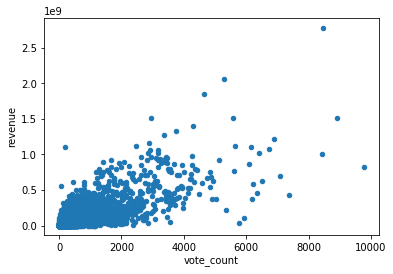

In [30]:
df.plot(x='vote_count' , y='revenue' ,kind = 'scatter');

In [31]:
df.rev_high.plot(x='vote_count' , y='revenue' ,kind = 'scatter');

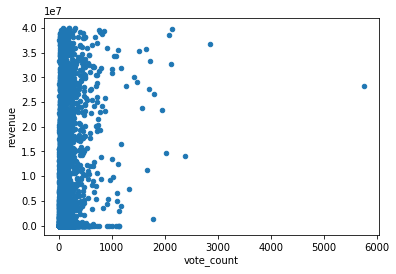

In [32]:
df.rev_low.plot(x='vote_count' , y='revenue' ,kind = 'scatter');

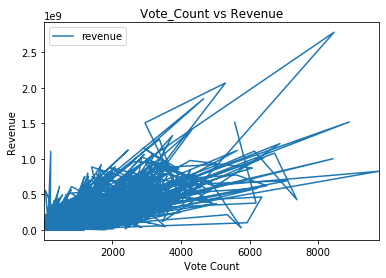

In [33]:
df.plot(x ='vote_count', y='revenue', kind = 'line')

plt.title('Vote_Count vs Revenue')
plt.ylabel('Revenue')
plt.xlabel('Vote Count')

plt.show()

### Whether Budget is associated with Revenue?


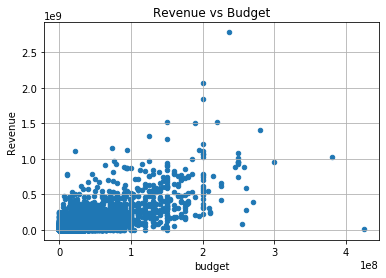

In [61]:
ax =df.plot(x='budget' , y='revenue' ,kind = 'scatter');
ax.set_title('Revenue vs Budget')
ax.set_xlabel('budget')
ax.set_ylabel('Revenue')
plt.grid(True)


Text(0, 0.5, 'Revenue')

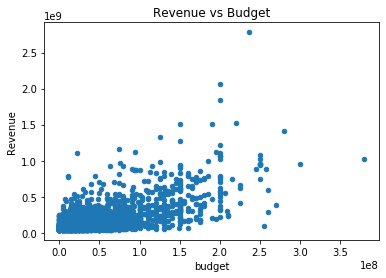

In [35]:
ax = df.rev_high.plot(x='budget' , y='revenue' ,kind = 'scatter');
ax.set_title('Revenue vs Budget')
ax.set_xlabel('budget')
ax.set_ylabel('Revenue')

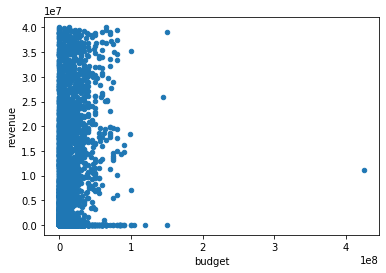

In [59]:
df.rev_low.plot(x='budget' , y='revenue' ,kind = 'scatter');

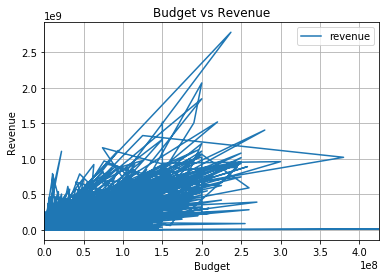

In [57]:
df.plot(x ='budget', y='revenue', kind = 'line')

plt.title('Budget vs Revenue')
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.legend()
plt.grid(True)
plt.show()

### What are the Top 10 Movies made revenue and the Top 10 Actors and Top 10 years with highest Revenue movies?

In [38]:
df_sorted = df.copy()

In [39]:
df_sorted.sort_values(by='revenue',ascending=False ,inplace = True)

In [40]:
df_top = df_sorted.head(10)

In [41]:
df_top

popularity     budget     revenue  \
1386    9.432768  237000000  2781505847   
3      11.173104  200000000  2068178225   
5231    4.355219  200000000  1845034188   
4361    7.637767  220000000  1519557910   
0      32.985763  150000000  1513528810   
4       9.335014  190000000  1506249360   
14      5.944927  280000000  1405035767   
3374    5.711315  125000000  1327817822   
5422    6.112766  150000000  1274219009   
5425    4.946136  200000000  1215439994   

                                    original_title                 director  \
1386                                        Avatar            James Cameron   
3                     Star Wars: The Force Awakens              J.J. Abrams   
5231                                       Titanic            James Cameron   
4361                                  The Avengers              Joss Whedon   
0                                   Jurassic World          Colin Trevorrow   
4                                        Furious 7                James Wan   
14                         Avengers: Age of Ultron              Joss Whedon   
3374  Harry Potter and the Deathly Hallows: Part 2              David Yates   
5422                                        Frozen  Chris Buck|Jennifer Lee   
5425                                    Iron Man 3              Shane Black   

      runtime                                     genres release_date  \
1386      162   Action|Adventure|Fantasy|Science Fiction   2009-12-10   
3         136   Action|Adventure|Science Fiction|Fantasy   2015-12-15   
5231      194                     Drama|Romance|Thriller   1997-11-18   
4361      143           Science Fiction|Action|Adventure   2012-04-25   
0         124  Action|Adventure|Science Fiction|Thriller   2015-06-09   
4         137                      Action|Crime|Thriller   2015-04-01   
14        141           Action|Adventure|Science Fiction   2015-04-22   
3374      130                   Adventure|Family|Fantasy   2011-07-07   
5422      102                 Animation|Adventure|Family   2013-11-27   
5425      130           Action|Adventure|Science Fiction   2013-04-18   

      vote_count  vote_average  release_year  
1386        8458           7.1          2009  
3           5292           7.5          2015  
5231        4654           7.3          1997  
4361        8903           7.3          2012  
0           5562           6.5          2015  
4           2947           7.3          2015  
14          4304           7.4          2015  
3374        3750           7.7          2011  
5422        3369           7.5          2013  
5425        6882           6.9          2013

### Can we provide a list of directors that generates big revenue?

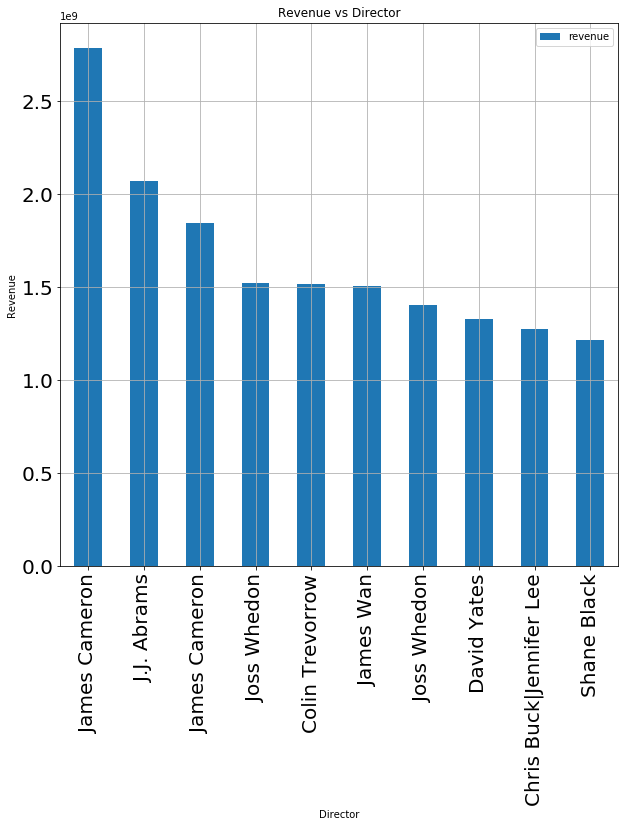

In [56]:
ax = df_top.plot(x="director", y="revenue", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Revenue vs Director')
ax.set_xlabel('Director')
ax.set_ylabel('Revenue')
plt.legend()
plt.grid(True)

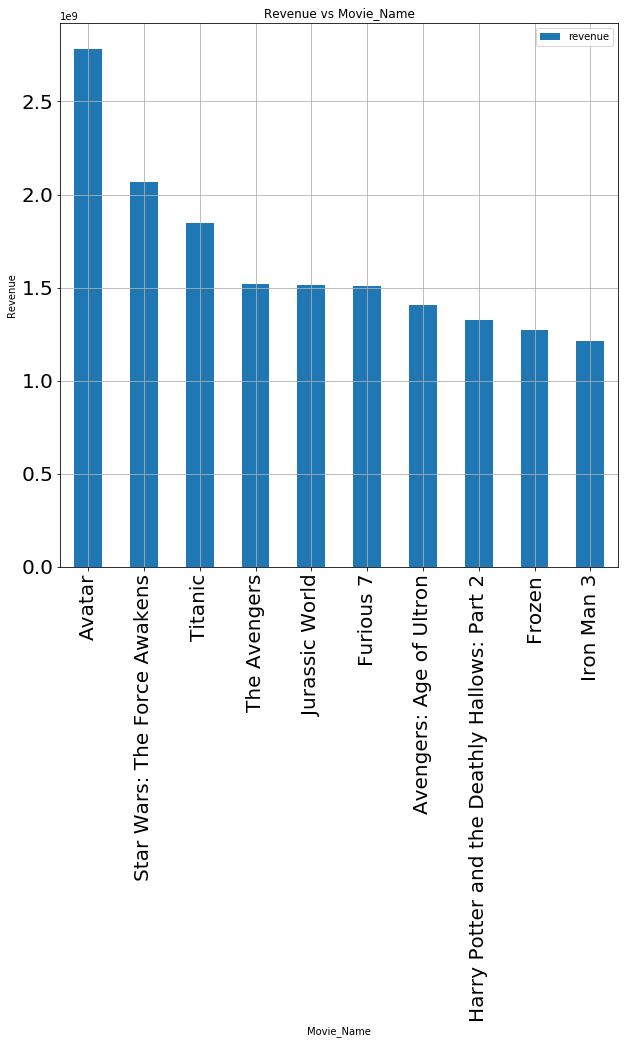

In [55]:
ax = df_top.plot(x="original_title", y="revenue", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Revenue vs Movie_Name')
ax.set_xlabel('Movie_Name')
ax.set_ylabel('Revenue')
plt.legend()
plt.grid(True)

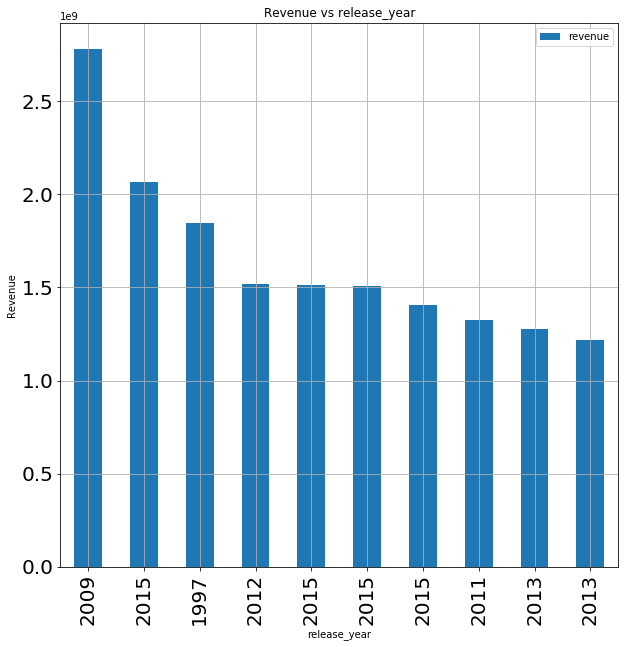

In [54]:
ax = df_top.plot(x="release_year", y="revenue", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Revenue vs release_year')
ax.set_xlabel('release_year')
ax.set_ylabel('Revenue')
plt.legend()
plt.grid(True)

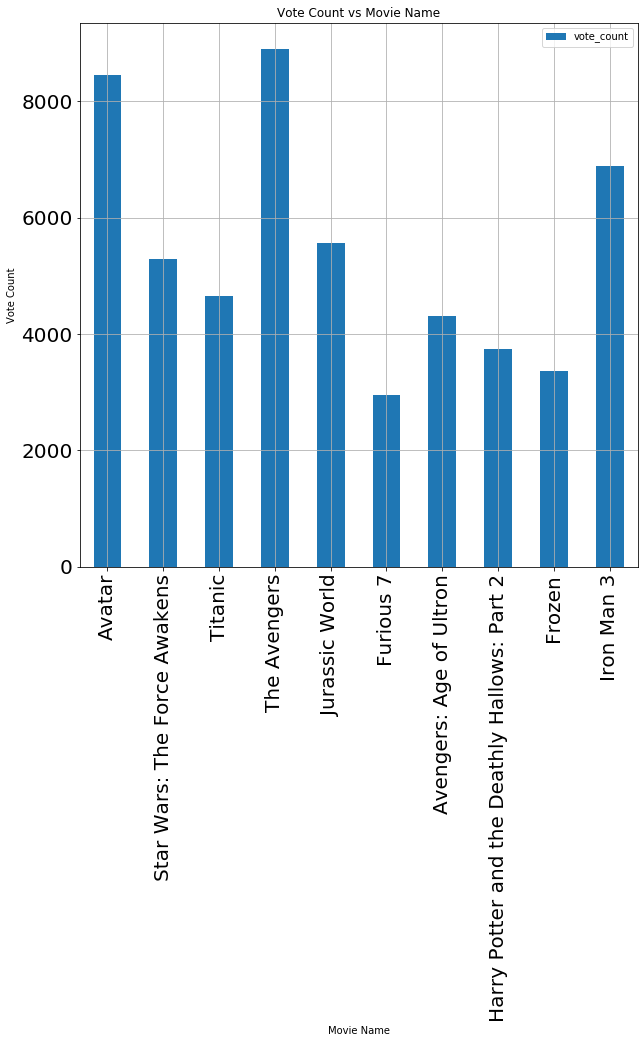

In [53]:
ax = df_top.plot(x="original_title", y="vote_count", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Vote Count vs Movie Name')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Vote Count')
plt.legend()
plt.grid(True)

### What are typical runtimes for directors? Is there a duration preferred by directors?

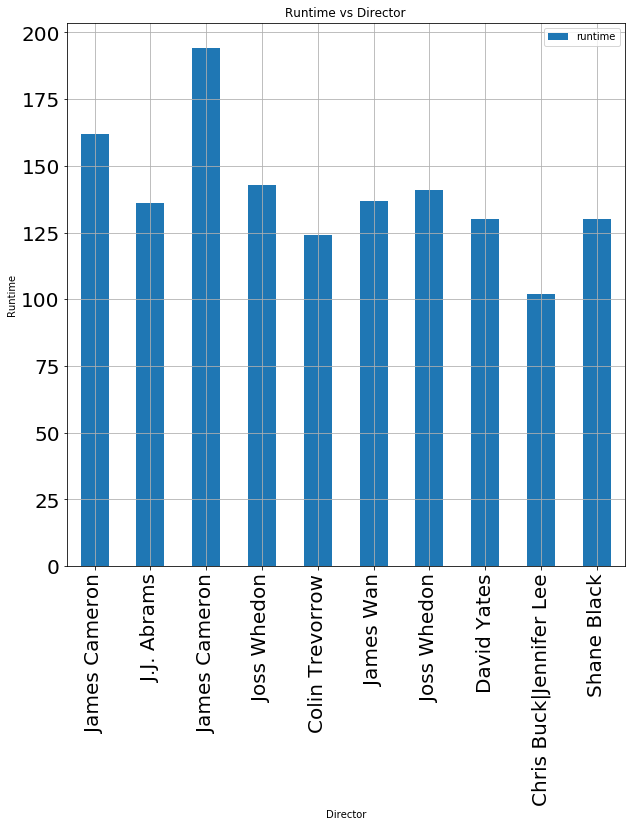

In [52]:
ax = df_top.plot(x="director", y="runtime", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Runtime vs Director')
ax.set_xlabel('Director')
ax.set_ylabel('Runtime')
plt.legend()
plt.grid(True)

### Can we provide a list of the most popular directors based on ratings?

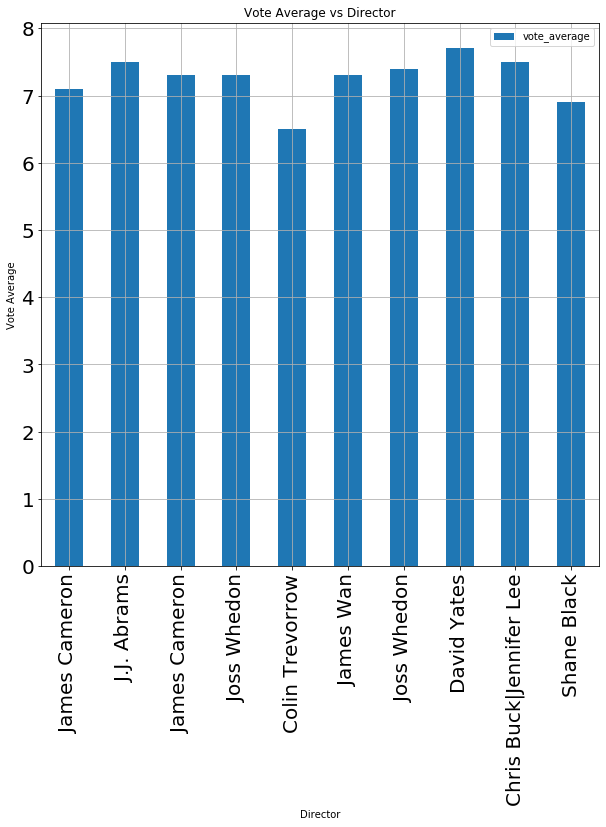

In [51]:
ax = df_top.plot(x="director", y="vote_average", kind="bar", fontsize=20 , figsize=(10,10));
ax.set_title('Vote Average vs Director')
ax.set_xlabel('Director')
ax.set_ylabel('Vote Average')
plt.legend()
plt.grid(True)

### Do top ratings movies always generate big revenue?

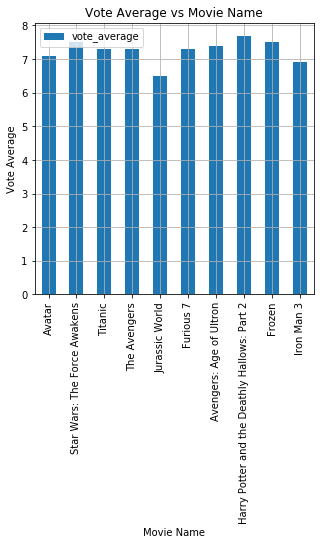

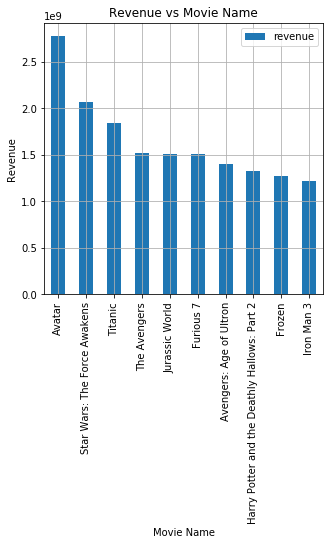

In [64]:
ax = df_top.plot(x="original_title", y="vote_average", kind="bar", fontsize=10 , figsize=(5,5));
ax.set_title('Vote Average vs Movie Name')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Vote Average')
plt.legend()
plt.grid(True)

ax2 = df_top.plot(x="original_title", y="revenue", kind="bar", fontsize=10 , figsize=(5,5));
ax2.set_title('Revenue vs Movie Name')
ax2.set_xlabel('Movie Name')
ax2.set_ylabel('Revenue')
plt.legend()
plt.grid(True)

### The answer is NO top rating movies doesn't generate high revenue Avatar made the highest revenue but it doesn't have the highest rating

### Do higher budget movies always generate big revenue?

### The answer is NO Avengers Age of Ultron is the highest budget but is not the highest revenue

### Explanation of Below Graphs
1- I was getting the relation if the revenue and budget affect the top 10 movies in all the years but my insights that revenue exceed the budget by a very large number in all movies. so high budget doesn't affect the order of the movie.

2- In the second one I was getting a relation between the movie and the popularity and the vote average to know if the voting has a relation with the popularity but the my insights show that there is a relation between the vote average and the popularity as they are close to each other. that show the credibility of that data.


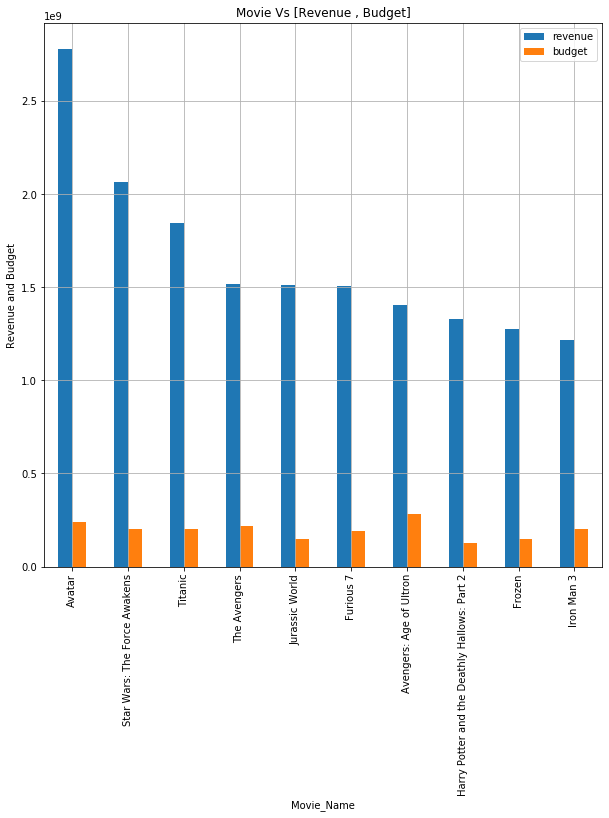

In [50]:
ax = df_top.plot(x="original_title", y=["revenue", "budget"], kind="bar" , figsize=(10,10));
ax.set_title('Movie Vs [Revenue , Budget]')
ax.set_xlabel('Movie_Name')
ax.set_ylabel('Revenue and Budget')
plt.legend()
plt.grid(True)

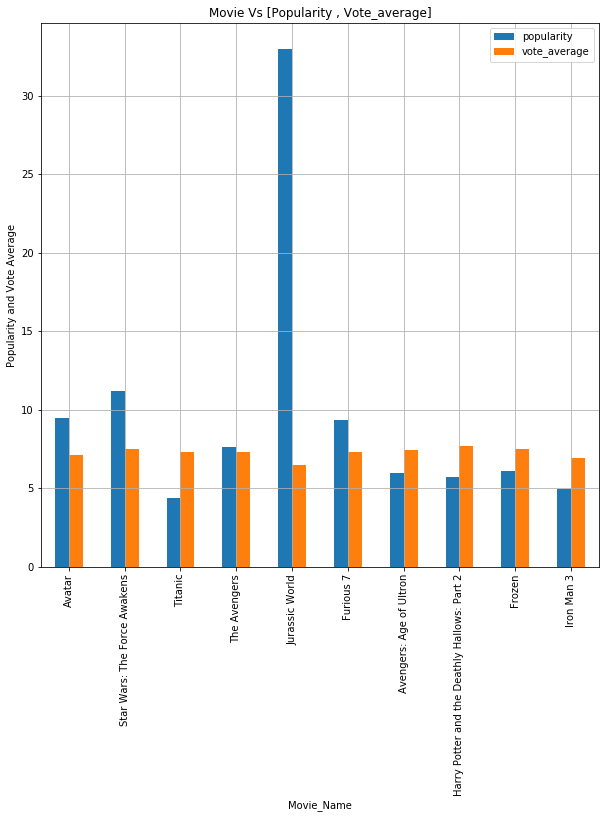

In [49]:
ax = df_top.plot(x="original_title", y=["popularity", "vote_average"], kind="bar" , figsize=(10,10));
ax.set_title('Movie Vs [Popularity , Vote_average]')
ax.set_xlabel('Movie_Name')
ax.set_ylabel('Popularity and Vote Average')
plt.legend()
plt.grid(True)


<a id='conclusions'></a>
## Conclusions

 
### First insight from total revenue with total vote count:
It is that the movies with vote counts close to each other have close revenue values also as the votes increase the revenue is increasing 

### Second insight from high revenue above mean with it's vote count:
There is a relation between votes and high revenue as the votes increase the revenue is increasing and there is votes from zero to 10000

### Third insight from low revenue below mean and it's vote count:
There is a relation between votes and low revenue as all the votes are below 1000 have low revenue so votes affect revenue.

### Conclusion from first question:
There is a semi linear relation between votes and revenue. That low revenue movies have votes count below 1000 while high revenue movies has counts from 0 to 10000 and also the the low revenue movies record numbers is much more higher than high revenue record numbers and all the vote counts close to zero have high revenue in the low revenue scatter plot which is considered a low value.



### First Insight From total revenue with total budget:
As the budget increase the revenue increase

### Second Insight from high revenue and it's budget:
It is the same but the budget scale is more accurate because the data of high revenue is smaller and it shows there is a an increase in revenue as the budget is increasing.

### Third insight from low revenue and it's budget:
All low budgets cause low revenue as you see all the points are aggregated at the left of the graph

### Conclusion from second question:
Budget affect the revenue made by the movie as you have high budget you have high revenue.


### The Top 10 Movies are:
Avatar

Star Wars: The Force Awakens

Titanic 	

The Avengers

Jurassic World

Furious 7

Avengers: Age of Ultron

Harry Potter and the Deathly Hallows: Part 2

Frozen

Iron Man 3

### Directors with Highest Revenue 

James Cameron

J.J. Abrams 	

Joss Whedon

Colin Trevorrow

James Wan

David Yates

Chris Buck|Jennifer Lee

Shane Black


### Insights:
Movies revenue is always greater than the budget.

Budgets of the first 10 movies are close to each other.

Vote average is close to the popluarity of the movies in most of the time.

The highest popularity movie doesn't have the highest revenue

2009 is the year with the highest revenue movie.

The highest movie with votes don't have the highest revenue.


### Limitations:

We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.
